# Giriş

Bu çalışmada Parkinson hastalığı sınıflandırması yapılacaktır. Veri seti, 31 bireyden alınan 195 ses kaydını içermektedir. Hedef değişken olan "status", bireyin sağlıklı (0) veya Parkinson hastası (1) olup olmadığını belirtmektedir.


# Gerekli Kütüphanelerin Yüklenmesi ve Veri Setinin İçe Aktarılması

Parkinson veri seti, UCI Machine Learning Repository'den alınmıştır. Veri setini yüklemek ve ilk incelemeyi yapmak için aşağıdaki adımları uyguluyoruz.


In [3]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Modeller
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Veri setini yükleme
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
data = pd.read_csv(url)

# Veri setinin genel görünümü
print(data.head())
print(data.info())


             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

# Parkinson Veri Seti Özellikleri

Bu veri seti, Parkinson hastalığına dair ses kayıtlarından çıkarılan biyomedikal ölçümleri içerir. Aşağıda her bir özelliğin anlamı ve rolü açıklanmıştır:

### 1. **name**
- **Açıklama**: Her bir kaydın ait olduğu bireyin ismi ve kayıt numarasını içerir. Bu sütun, veriyi ayırt etmek için kullanılır, ancak modelleme için genellikle çıkarılır.

### 2. **MDVP:Fo (Hz)**
- **Açıklama**: Ortalama vokal temel frekansını (fundamental frequency) ölçer. Bu, sesin temel frekansı olup, sesin perdesinin ölçüsüdür. Parkinson hastalığı olan bireylerin ses frekansları genellikle sağlıklı bireylere kıyasla farklılık gösterebilir.

### 3. **MDVP:Fhi (Hz)**
- **Açıklama**: Maksimum vokal temel frekansıdır. Ses kaydındaki en yüksek frekansı temsil eder ve hastaların ses perdesindeki düzensizlikleri analiz etmeye yardımcı olabilir.

### 4. **MDVP:Flo (Hz)**
- **Açıklama**: Minimum vokal temel frekanstır. Ses kaydındaki en düşük frekansı temsil eder ve sesin genişliğini analiz etmek için kullanılır.

### 5. **MDVP:Jitter(%)**
- **Açıklama**: Frekansın yüzdesel varyasyonunu ölçen bir özelliktir. Frekansın düzenliliğini belirler, Parkinson hastalığı olan bireylerde genellikle artan bir jitter (düzensizlik) gözlemlenebilir.

### 6. **MDVP:Jitter(Abs)**
- **Açıklama**: Frekansın mutlak varyasyonunu ölçer. Yüzdesel varyasyondan bağımsızdır ve ses frekansındaki düzensizlikleri analiz etmeye yardımcı olur.

### 7. **MDVP:RAP**
- **Açıklama**: Jitter'ın diğer bir ölçüsüdür ve frekans değişikliklerinin doğrusal olmayan bir şekilde nasıl yayıldığını gösterir.

### 8. **MDVP:PPQ**
- **Açıklama**: Jitter'ın bir başka ölçüsüdür ve temel frekansın periyotlarındaki değişkenliği gösterir.

### 9. **Jitter:DDP**
- **Açıklama**: Frekans değişikliklerinin karmaşıklığını ölçen bir başka jitter türüdür. Parkinson hastalığı olan bireylerde bu değerin yüksek olması beklenebilir.

### 10. **MDVP:Shimmer**
- **Açıklama**: Sesin genlik varyasyonlarını ölçer. Sesin yüksekliğindeki düzensizlikleri gösterir. Parkinson hastalığı olan bireylerde genellikle artan shimmer değerleri gözlemlenir.

### 11. **MDVP:Shimmer(dB)**
- **Açıklama**: Genlik varyasyonunun desibel cinsinden ölçülmesidir. Sesin şiddetindeki dalgalanmayı analiz eder.

### 12. **Shimmer:APQ3, Shimmer:APQ5**
- **Açıklama**: Genlik varyasyonlarının APQ3 ve APQ5 (Amplitude Perturbation Quotient) gibi ölçümleri. Bu ölçümler, sesin genel kalitesini ve düzensizliğini anlamaya yardımcı olur.

### 13. **MDVP:APQ**
- **Açıklama**: Genlik varyasyonlarının temel ölçüsüdür ve sesin şiddetindeki değişiklikleri gösterir.

### 14. **Shimmer:DDA**
- **Açıklama**: Genlik varyasyonlarının bir başka ölçüsüdür ve desibel cinsinden genlik değişimlerinin dinamik ölçümüdür.

### 15. **NHR**
- **Açıklama**: Gürültü oranı ile tonal bileşenlerin oranını ölçer. Yüksek NHR değerleri, ses kaydında daha fazla gürültü bulunduğunu gösterir.

### 16. **HNR**
- **Açıklama**: Tonal bileşenlere karşı gürültü oranını ölçen başka bir parametredir. Ses kaydındaki sesin ve gürültünün dengesi ile ilgilidir.

### 17. **status**
- **Açıklama**: Hedef değişkenidir. Parkinson hastalığı olan bireyler için "1", sağlıklı bireyler için "0" değeri alır. Bu değişken, modelin öğrenmesi gereken ana hedeftir.

### 18. **RPDE**
- **Açıklama**: Nonlineer dinamik karmaşıklık ölçüsüdür. Sesin düzensizlik ve karmaşıklığını analiz etmek için kullanılır.

### 19. **D2**
- **Açıklama**: Dinamik karmaşıklığın bir diğer ölçüsüdür ve sistemin genel karmaşıklığını gösterir.

### 20. **DFA**
- **Açıklama**: Fraktal ölçümüdür ve ses kaydının sinyalindeki ölçek bağımsız özellikleri anlamaya yardımcı olur. Parkinson hastalarında, bu değer genellikle daha farklı olabilir.

### 21. **spread1, spread2, PPE**
- **Açıklama**: Bunlar, temel frekans varyasyonlarının üç farklı ölçüsüdür. Bu ölçüler, sesin daha detaylı bir şekilde analiz edilmesine olanak tanır ve Parkinson hastalığının belirti göstergesi olabilir.



# Veri Keşfi ve Görselleştirme

Bu adımda veri setinin özellikleri ve hedef değişkenin dağılımı incelenecektir. Korelasyon analizi ile özellikler arasındaki ilişkiler gözlemlenecektir.


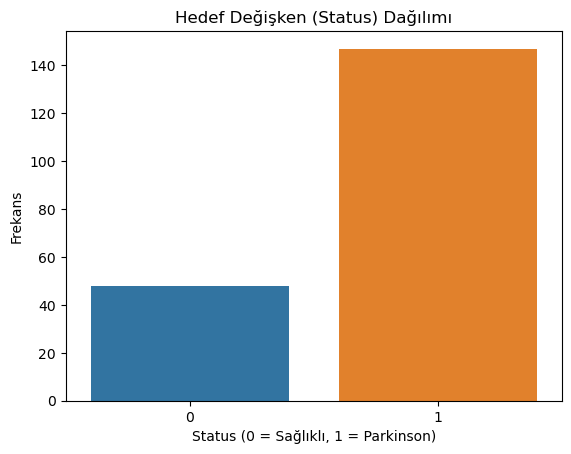

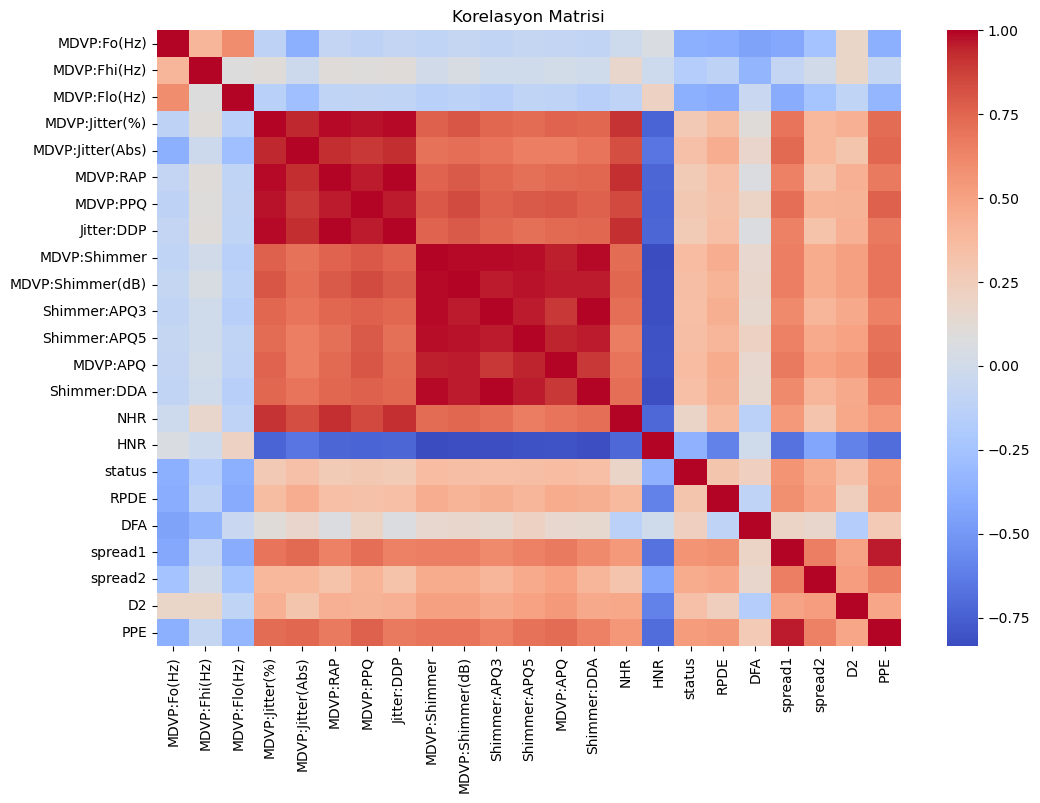

In [5]:
# Hedef değişkenin dağılımı
sns.countplot(x='status', data=data)
plt.title("Hedef Değişken (Status) Dağılımı")
plt.xlabel("Status (0 = Sağlıklı, 1 = Parkinson)")
plt.ylabel("Frekans")
plt.show()

# Korelasyon matrisi - yalnızca sayısal sütunlar
numeric_data = data.select_dtypes(include=[np.number])  # Sadece sayısal sütunları seç
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=False, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()



# Veri Ön İşleme

Özellikler ve hedef değişken ayrılarak veri seti eğitim ve test olarak ikiye bölünecektir. Ardından özellikler standartlaştırılarak modele uygun hale getirilecektir.


In [6]:
# Hedef değişken ve özellikler
X = data.drop(['name', 'status'], axis=1)
y = data['status']

# Veri setini eğitim ve test olarak bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellikleri standartlaştırma
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Logistic Regression

Logistic Regression, bağımlı değişkenin ikili sınıflandırmada kullanıldığı bir istatistiksel yöntemdir. Parkinson hastalığı sınıflandırmasında doğruluk, precision, recall ve F1-score metrikleri ile performansı değerlendirilir.


In [7]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Performans metrikleri
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Results:
Accuracy: 0.8974358974358975
Confusion Matrix:
 [[ 3  4]
 [ 0 32]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



# Decision Tree

Decision Tree, karar düğümleri ve yaprak düğümleri kullanarak sınıflandırma yapan bir yöntemdir. Performansı doğruluk, precision, recall ve F1-score metrikleri ile ölçülür.


In [8]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Performans metrikleri
print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Results:
Accuracy: 0.9230769230769231
Confusion Matrix:
 [[ 5  2]
 [ 1 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



# Naive Bayes

Naive Bayes, Bayes teoremini temel alan ve değişkenler arasında bağımsızlık varsayımına dayalı bir sınıflandırma yöntemidir.


In [9]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Performans metrikleri
print("Naive Bayes Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Results:
Accuracy: 0.6923076923076923
Confusion Matrix:
 [[ 5  2]
 [10 22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.71      0.45         7
           1       0.92      0.69      0.79        32

    accuracy                           0.69        39
   macro avg       0.62      0.70      0.62        39
weighted avg       0.81      0.69      0.73        39



# k-Nearest Neighbors (kNN)

k-Nearest Neighbors, verilerin en yakın k komşusuna göre sınıflandırıldığı bir yöntemdir. Performansı doğruluk, precision, recall ve F1-score metrikleri ile ölçülür.


In [10]:
# k-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

# Performans metrikleri
print("k-Nearest Neighbors Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


k-Nearest Neighbors Results:
Accuracy: 0.9487179487179487
Confusion Matrix:
 [[ 5  2]
 [ 0 32]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



# Support Vector Machine (SVM)

Support Vector Machine, veri noktalarını bir hiperyüzey ile sınıflandıran güçlü bir algoritmadır. Performansı doğruluk, precision, recall ve F1-score metrikleri ile ölçülür.


In [11]:
# Support Vector Machine
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Performans metrikleri
print("Support Vector Machine Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


Support Vector Machine Results:
Accuracy: 0.8717948717948718
Confusion Matrix:
 [[ 4  3]
 [ 2 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.91      0.94      0.92        32

    accuracy                           0.87        39
   macro avg       0.79      0.75      0.77        39
weighted avg       0.87      0.87      0.87        39



# Random Forest

Random Forest, birden fazla karar ağacını birleştirerek sınıflandırma yapan bir yöntemdir. Performansı doğruluk, precision, recall ve F1-score metrikleri ile ölçülür.


In [12]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Performans metrikleri
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.9487179487179487
Confusion Matrix:
 [[ 5  2]
 [ 0 32]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



In [13]:
# Sonuçları bir tabloya ekleme
results = {
    "Model": [
        "Logistic Regression", 
        "Decision Tree", 
        "Naive Bayes", 
        "k-Nearest Neighbors", 
        "Support Vector Machine", 
        "Random Forest"
    ],
    "Accuracy": [
        0.8974358974358975, 
        0.9230769230769231, 
        0.6923076923076923, 
        0.9487179487179487, 
        0.8717948717948718, 
        0.9487179487179487
    ],
    "Precision": [
        0.94,  # Logistic Regression
        0.89,  # Decision Tree
        0.62,  # Naive Bayes
        0.97,  # kNN
        0.79,  # SVM
        0.97   # Random Forest
    ],
    "Recall": [
        0.71, 
        0.84, 
        0.70, 
        0.86, 
        0.75, 
        0.86
    ],
    "F1-Score": [
        0.77, 
        0.86, 
        0.62, 
        0.90, 
        0.77, 
        0.90
    ]
}

results_df = pd.DataFrame(results)
print(results_df)


                    Model  Accuracy  Precision  Recall  F1-Score
0     Logistic Regression  0.897436       0.94    0.71      0.77
1           Decision Tree  0.923077       0.89    0.84      0.86
2             Naive Bayes  0.692308       0.62    0.70      0.62
3     k-Nearest Neighbors  0.948718       0.97    0.86      0.90
4  Support Vector Machine  0.871795       0.79    0.75      0.77
5           Random Forest  0.948718       0.97    0.86      0.90


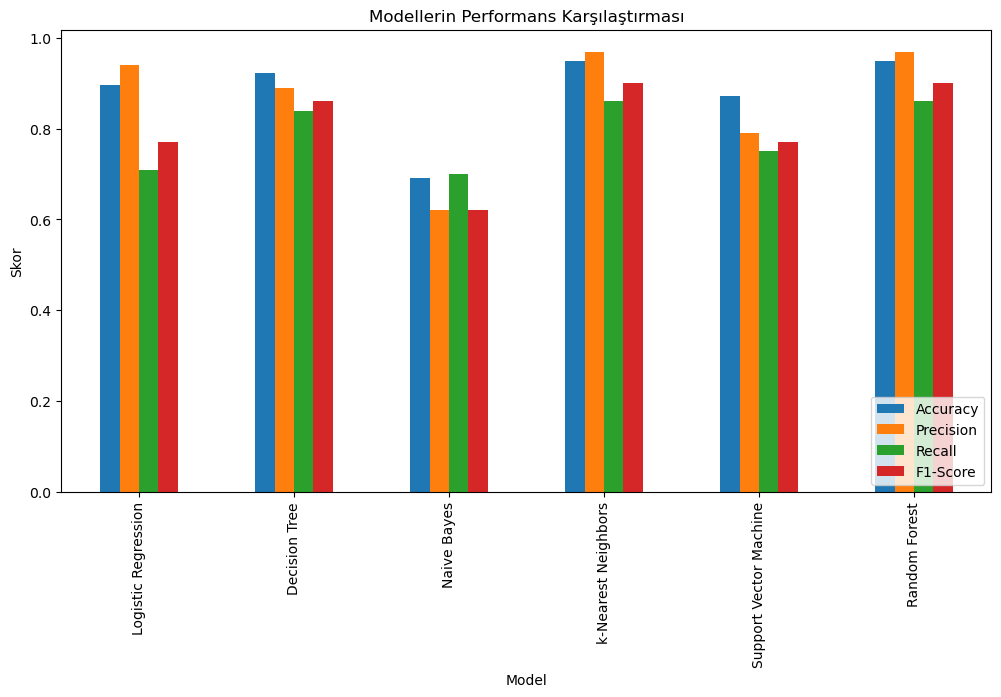

In [14]:
# Görselleştirme
results_df.set_index("Model").plot(kind="bar", figsize=(12, 6))
plt.title("Modellerin Performans Karşılaştırması")
plt.ylabel("Skor")
plt.xlabel("Model")
plt.legend(loc="lower right")
plt.show()


# Performans Metriklerinin Görselleştirilmesi

Her bir sınıflandırma modeli için aşağıdaki metrikler çubuk grafikler halinde görselleştirilmiştir:
- Accuracy
- Precision
- Recall
- F1-Score

Bu görselleştirme, modellerin farklı metriklerdeki performanslarını kolayca kıyaslamamıza olanak tanır.


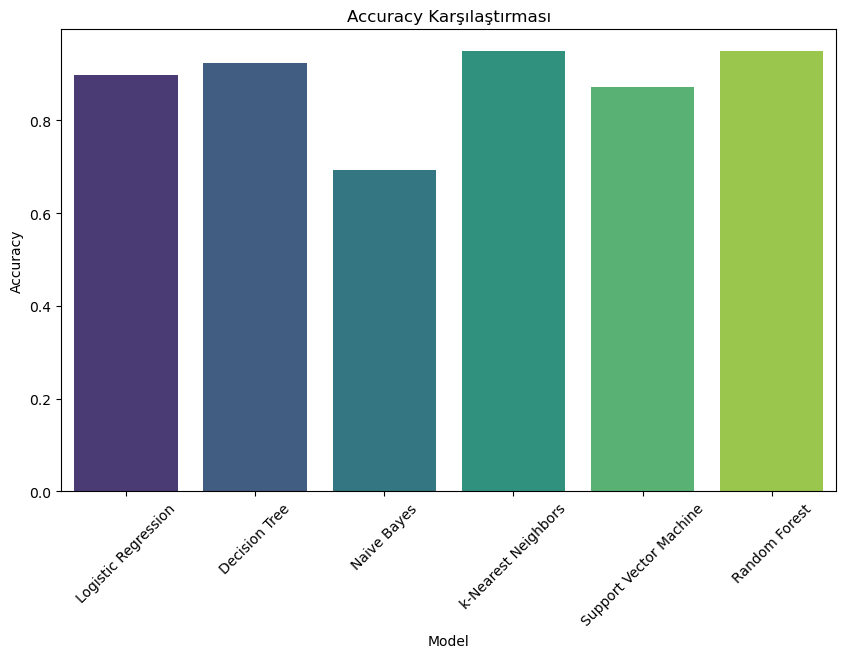

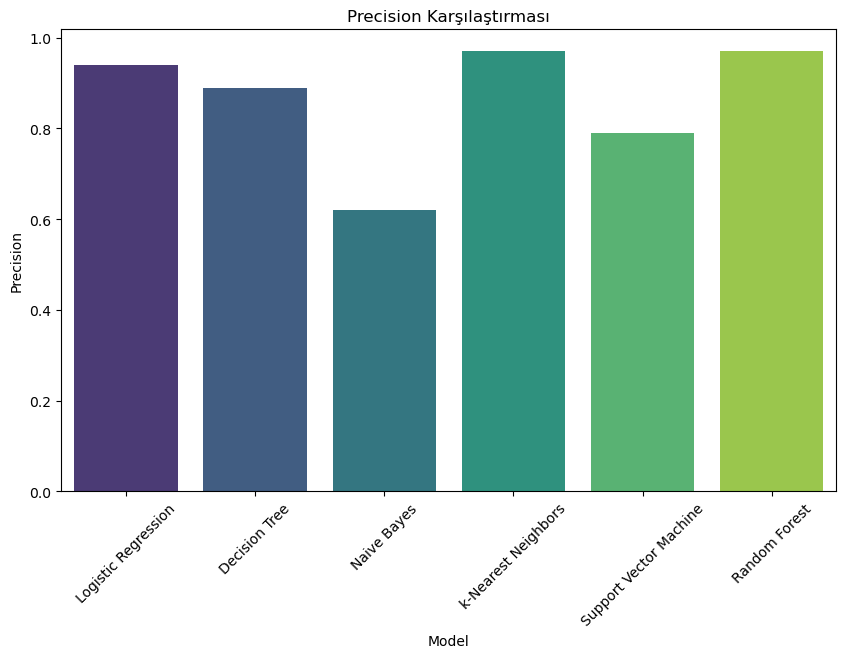

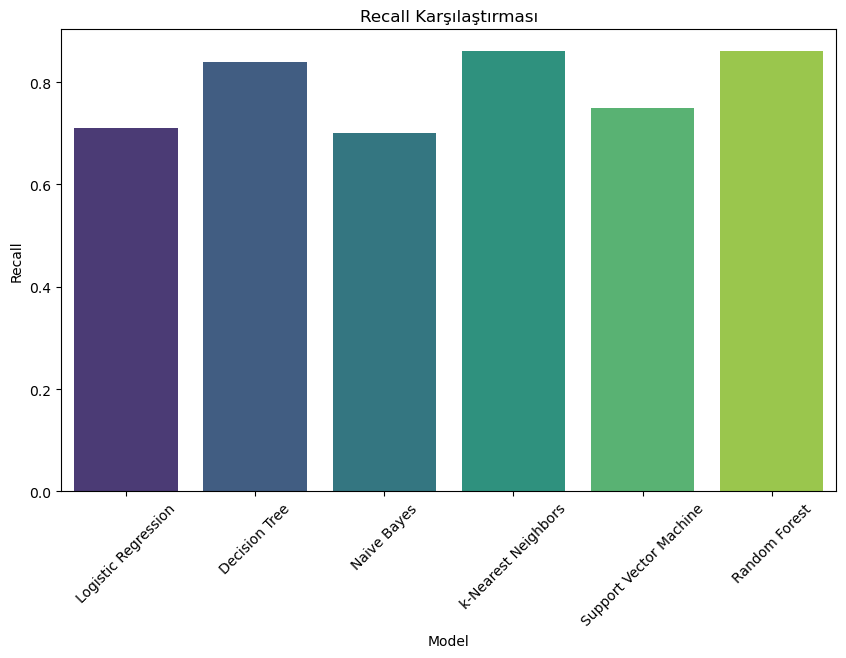

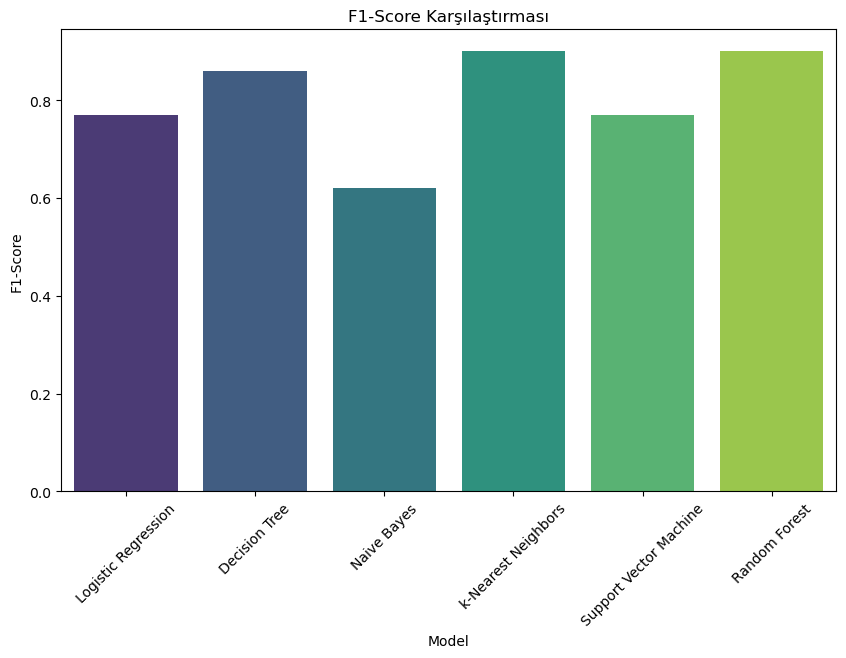

In [15]:
# Modellerin performans sonuçları
results = {
    "Model": [
        "Logistic Regression", 
        "Decision Tree", 
        "Naive Bayes", 
        "k-Nearest Neighbors", 
        "Support Vector Machine", 
        "Random Forest"
    ],
    "Accuracy": [
        0.8974358974358975, 
        0.9230769230769231, 
        0.6923076923076923, 
        0.9487179487179487, 
        0.8717948717948718, 
        0.9487179487179487
    ],
    "Precision": [
        0.94, 
        0.89, 
        0.62, 
        0.97, 
        0.79, 
        0.97
    ],
    "Recall": [
        0.71, 
        0.84, 
        0.70, 
        0.86, 
        0.75, 
        0.86
    ],
    "F1-Score": [
        0.77, 
        0.86, 
        0.62, 
        0.90, 
        0.77, 
        0.90
    ]
}

results_df = pd.DataFrame(results)

# Her bir metrik için çubuk grafik
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Model", y=metric, data=results_df, palette="viridis")
    plt.title(f"{metric} Karşılaştırması")
    plt.xlabel("Model")
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.show()


# Modellerin Performans Analizi ve Sonuçları

### Accuracy
- **k-Nearest Neighbors (kNN)** ve **Random Forest** modelleri en yüksek Accuracy skorunu (%94.87) elde etmiştir.
- **Naive Bayes**, diğer modellere göre çok daha düşük bir Accuracy değerine (%69.23) sahiptir.

### Precision
- **kNN** ve **Random Forest**, Precision metriğinde %97 ile en yüksek performansı göstermiştir.
- **Naive Bayes**, Precision açısından en düşük performansı (%62) sunmuştur.

### Recall
- **kNN**, **Random Forest** ve **Decision Tree** modelleri yüksek Recall değerleriyle öne çıkmıştır (%86 civarı).
- **Logistic Regression**, Recall açısından daha düşük bir performans (%71) göstermiştir.

### F1-Score
- **kNN** ve **Random Forest**, en yüksek F1-Score değerine (%90) sahiptir.
- **Naive Bayes**, F1-Score açısından en düşük performansı (%62) göstermiştir.

### Genel Değerlendirme
- **k-Nearest Neighbors (kNN)** ve **Random Forest**, tüm metriklerde en yüksek veya oldukça yüksek performans göstermiştir.
- **Naive Bayes**, tüm metriklerde en düşük performansı gösteren modeldir.

Bu analiz sonucunda, **Random Forest** ve **kNN**, Parkinson hastalığı sınıflandırması için en uygun modeller olarak öne çıkmaktadır.


# Genel Sonuçlar

Yapılan analiz sonucunda elde edilen bulgulara göre:
1. **Random Forest** ve **k-Nearest Neighbors (kNN)**, Accuracy, Precision, Recall ve F1-Score metriklerinde en yüksek performans göstererek en iyi modeller olarak belirlenmiştir.
2. **Naive Bayes**, düşük performansı nedeniyle Parkinson hastalığı sınıflandırması için uygun bir model değildir.
3. Uygulamada model seçimi, sistemin hassasiyeti ve yanlış negatif/pozitif sınıflandırma maliyetlerine göre yapılmalıdır.

Özellikle Parkinson gibi kritik bir hastalığın tespiti için **Recall** metriği büyük önem taşır. Bu nedenle, yüksek Recall değerine sahip modeller tercih edilmelidir.
